In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [3]:
train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')

In [4]:
test_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/test.csv")

### Dscription of data

* categorical data are appended as cat
* binary data are appended as bin
* Other columns are either continuous or ordinal

Also it is gven that missing values are given by -1

In [5]:
#replacing -1 by nan for proper analysis
train_data[ train_data==-1 ] = np.nan

In [6]:
#replacing -1 by nan for proper analysis
test_data[ test_data==-1 ] = np.nan

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416648 entries, 0 to 416647
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              416648 non-null  int64  
 1   target          416648 non-null  int64  
 2   ps_ind_01       416648 non-null  int64  
 3   ps_ind_02_cat   416500 non-null  float64
 4   ps_ind_03       416648 non-null  int64  
 5   ps_ind_04_cat   416593 non-null  float64
 6   ps_ind_05_cat   412601 non-null  float64
 7   ps_ind_06_bin   416648 non-null  int64  
 8   ps_ind_07_bin   416648 non-null  int64  
 9   ps_ind_08_bin   416648 non-null  int64  
 10  ps_ind_09_bin   416648 non-null  int64  
 11  ps_ind_10_bin   416648 non-null  int64  
 12  ps_ind_11_bin   416648 non-null  int64  
 13  ps_ind_12_bin   416648 non-null  int64  
 14  ps_ind_13_bin   416648 non-null  int64  
 15  ps_ind_14       416648 non-null  int64  
 16  ps_ind_15       416648 non-null  int64  
 17  ps_ind_16_

In [8]:
train_data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,335098,0,4,1.0,8,1.0,0.0,0,0,0,1,0,0,0,0,0,7,1,0,0,0.6,0.4,0.722842,6.0,1.0,NaN,0,0.0,4,1.0,0,0.0,1,84,2.0,0.316228,0.844843,0.366742,3.605551,0.1,0.5,0.0,3,1,9,4,10,2,8,10,0,3,7,0,0,0,0,0,0
1,1353173,1,4,2.0,6,1.0,0.0,0,0,1,0,0,0,0,0,0,9,1,0,0,0.4,0.0,NaN,0.0,0.0,NaN,0,1.0,7,1.0,1,0.0,1,92,3.0,0.400000,0.813027,0.404599,3.316625,0.6,0.0,0.8,2,1,10,2,7,1,5,6,0,2,9,1,0,0,0,1,0
2,1446937,0,5,1.0,7,0.0,0.0,1,0,0,0,0,0,0,0,0,10,1,0,0,0.7,1.0,1.133027,11.0,1.0,NaN,0,NaN,0,1.0,0,2.0,1,86,3.0,0.400000,1.056757,NaN,3.605551,0.6,0.6,0.3,4,2,9,5,8,2,4,6,0,2,11,0,1,0,0,0,0
3,667154,0,3,3.0,5,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,1,0,0.5,0.3,0.860596,7.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,49,3.0,0.400000,0.766135,0.368511,3.464102,0.0,0.3,0.5,1,2,9,4,7,3,9,3,1,3,6,0,0,1,0,0,0
4,859097,0,2,2.0,2,1.0,0.0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.8,0.2,0.556215,11.0,1.0,NaN,0,NaN,11,1.0,1,2.0,1,36,3.0,0.374166,0.841400,0.379342,3.605551,0.2,0.0,0.5,2,1,9,2,8,3,6,5,3,4,7,0,0,1,0,0,0


In [9]:
train_data.nunique()

id                416648
target                 2
ps_ind_01              8
ps_ind_02_cat          4
ps_ind_03             12
ps_ind_04_cat          2
ps_ind_05_cat          7
ps_ind_06_bin          2
ps_ind_07_bin          2
ps_ind_08_bin          2
ps_ind_09_bin          2
ps_ind_10_bin          2
ps_ind_11_bin          2
ps_ind_12_bin          2
ps_ind_13_bin          2
ps_ind_14              5
ps_ind_15             14
ps_ind_16_bin          2
ps_ind_17_bin          2
ps_ind_18_bin          2
ps_reg_01             10
ps_reg_02             19
ps_reg_03           4967
ps_car_01_cat         12
ps_car_02_cat          2
ps_car_03_cat          2
ps_car_04_cat         10
ps_car_05_cat          2
ps_car_06_cat         18
ps_car_07_cat          2
ps_car_08_cat          2
ps_car_09_cat          5
ps_car_10_cat          3
ps_car_11_cat        104
ps_car_11              4
ps_car_12            176
ps_car_13          60732
ps_car_14            827
ps_car_15             15
ps_calc_01            10


It seems that there are very less amount of unique values. Hence it can be concluded that the data present are discrete in nature.

Only following columns may have continuous data
* ps_reg_03
* ps_car_12
* ps_car_13
* ps_car_14

Apart from above columns, leaving bin and cat, rest are ordinal in nature.

Also ps_car_11_cat contain large number of categories

In [10]:
def nan_value_count(df) : 
    totalcnt = len(list(df.index))
    for col in df.columns : 
        null_cnt = totalcnt - df[col].count()
        perct = round(null_cnt*100/totalcnt, 2 )
        print(col,'\t',null_cnt,'\t',perct)

def zero_value_count(df) : 
    totalcnt = len(list(df.index))
    l=[]
    for col in df.columns : 
        zero_cnt = df[[col]][df[col]==0].count(); 
        perct = round(zero_cnt/totalcnt, 2 )
        if float(perct) >= 0.99 : 
            l.append(col)
        print(col,'\t',perct)
    return l


Separating binary, categorical, and other kinds of data and analysing them separately with target variable.

In [11]:
train_data_bin = train_data[['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin',\
                             'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin',\
                             'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin',\
                             'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',\
                             'ps_calc_20_bin','target']]

In [12]:
train_data_cat = train_data[['target', 'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat','ps_car_01_cat',\
                             'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', \
                             'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', \
                             'ps_car_10_cat', 'ps_car_11_cat',]]

In [13]:
train_data_rest = train_data.copy()
train_data_rest = train_data[train_data_rest.columns.difference(train_data_bin.columns)]
train_data_rest = train_data[train_data_rest.columns.difference(train_data_cat.columns)]
train_data_rest['target'] = train_data['target']
train_data_rest.drop(labels='id', inplace=True, axis=1)

In [14]:
test_data_bin = test_data[['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin',\
                             'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin',\
                             'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin',\
                             'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',\
                             'ps_calc_20_bin']]

In [15]:
test_data_cat = test_data[[ 'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat','ps_car_01_cat',\
                             'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', \
                             'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', \
                             'ps_car_10_cat', 'ps_car_11_cat',]]

In [16]:
test_data_rest = test_data.copy()
test_data_rest = test_data[test_data_rest.columns.difference(test_data_bin.columns)]
test_data_rest = test_data[test_data_rest.columns.difference(test_data_cat.columns)]
test_data_rest.drop(labels='id', inplace=True, axis=1)


In [17]:
print(train_data_bin.columns)
print(train_data_cat.columns)
print(train_data_rest.columns)

Index(['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin',
       'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin', 'target'],
      dtype='object')
Index(['target', 'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object')
Index(['ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05',
       'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10',
       'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_ind_01',
       'ps_ind_03', 'ps_ind_14', 'ps

In [18]:
def multiple_plot_count_plot(df,target,columns,nrow,ncol) : 
    fig, axes = plt.subplots(nrows = nrow, ncols = ncol, figsize=(20, 30))
    row_idx = 0; col_idx = 0;
    for col in columns : 
        sns.countplot(x=col, hue=target, data=df, ax=axes[row_idx][col_idx])
        col_idx = col_idx + 1
        if col_idx >= ncol : 
            col_idx = 0; row_idx = row_idx + 1
        if row_idx >= nrow : 
            break
            
            
            
def multiple_plot_box_plot(df,target,columns,nrow,ncol) : 
    fig, axes = plt.subplots(nrows = nrow, ncols = ncol, figsize=(20, 30))
    row_idx = 0; col_idx = 0;
    for col in columns : 
        sns.boxplot(y=col, x=target, data=df, ax=axes[row_idx][col_idx])
        col_idx = col_idx + 1
        if col_idx >= ncol : 
            col_idx = 0; row_idx = row_idx + 1
        if row_idx >= nrow : 
            break
            
            
            
def multiple_plot_dist_plot(df,target,columns,nrow,ncol) : 
    fig, axes = plt.subplots(nrows = nrow, ncols = ncol, figsize=(20, 30))
    row_idx = 0; col_idx = 0;
    for col in columns : 
        sns.distplot(df[col], ax=axes[row_idx][col_idx])
        col_idx = col_idx + 1
        if col_idx >= ncol : 
            col_idx = 0; row_idx = row_idx + 1
        if row_idx >= nrow : 
            break

def encode_FE(df1,df2,cols):
    for col in cols:
        vc = df1[col].value_counts(dropna=False, normalize=True).to_dict()        
        nm = col+'_FE'
        df1[nm] = df1[col].map(vc)
        df2[nm] = df2[col].map(vc)
        df1[nm] = df1[nm].astype('float32')
        df2[nm] = df2[nm].astype('float32')
        df1.drop(col, axis=1, inplace=True)
        df2.drop(col, axis=1, inplace=True)

# Miscellaneous data analysis : 

In [19]:
nan_value_count(train_data_rest)

ps_calc_01 	 0 	 0.0
ps_calc_02 	 0 	 0.0
ps_calc_03 	 0 	 0.0
ps_calc_04 	 0 	 0.0
ps_calc_05 	 0 	 0.0
ps_calc_06 	 0 	 0.0
ps_calc_07 	 0 	 0.0
ps_calc_08 	 0 	 0.0
ps_calc_09 	 0 	 0.0
ps_calc_10 	 0 	 0.0
ps_calc_11 	 0 	 0.0
ps_calc_12 	 0 	 0.0
ps_calc_13 	 0 	 0.0
ps_calc_14 	 0 	 0.0
ps_car_11 	 1 	 0.0
ps_car_12 	 0 	 0.0
ps_car_13 	 0 	 0.0
ps_car_14 	 29822 	 7.16
ps_car_15 	 0 	 0.0
ps_ind_01 	 0 	 0.0
ps_ind_03 	 0 	 0.0
ps_ind_14 	 0 	 0.0
ps_ind_15 	 0 	 0.0
ps_reg_01 	 0 	 0.0
ps_reg_02 	 0 	 0.0
ps_reg_03 	 75476 	 18.12
target 	 0 	 0.0


In [20]:
print(train_data_rest[["ps_car_11"]].value_counts() ) 
print(train_data_rest[["ps_car_12"]].value_counts() ) 
print(train_data_rest[["ps_car_14"]].value_counts() ) 
print(train_data_rest[["ps_reg_03"]].value_counts() ) 


ps_car_11
3.0          223160
2.0          132555
1.0           42647
0.0           18285
dtype: int64
ps_car_12
0.316228     119253
0.400000      78360
0.374166      69215
0.447214      34648
0.424264      34513
              ...  
0.496387          1
0.655744          1
0.626099          1
0.647997          1
0.544243          1
Length: 176, dtype: int64
ps_car_14
0.361525     12367
0.358329     10868
0.361939      8331
0.368782      8104
0.397492      6758
             ...  
0.459130         1
0.524404         1
0.435431         1
0.416773         1
0.437721         1
Length: 827, dtype: int64
ps_reg_03
0.633936     473
0.704894     446
0.587899     443
0.602599     442
0.668487     426
            ... 
1.199218       1
1.682632       1
1.683003       1
1.685786       1
1.681517       1
Length: 4967, dtype: int64


In [21]:
#filling null values in train_data_rest

train_data_rest["ps_car_11"].fillna(value= train_data_rest["ps_car_11"].mode()[0], inplace=True)
train_data_rest["ps_car_12"].fillna(value= train_data_rest["ps_car_12"].mean(), inplace=True);
train_data_rest["ps_car_14"].fillna(value=train_data_rest["ps_car_14"].mean(), inplace=True);
train_data_rest["ps_reg_03"].fillna(value=train_data_rest["ps_reg_03"].mean(), inplace=True);

In [22]:
#filling null values in train_data_rest

test_data_rest["ps_car_11"].fillna(value= train_data_rest["ps_car_11"].mode()[0], inplace=True)
test_data_rest["ps_car_12"].fillna(value= train_data_rest["ps_car_12"].mean(), inplace=True);
test_data_rest["ps_car_14"].fillna(value= train_data_rest["ps_car_14"].mean(), inplace=True);
test_data_rest["ps_reg_03"].fillna(value= train_data_rest["ps_reg_03"].mean(), inplace=True);

In [23]:
train_data_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416648 entries, 0 to 416647
Data columns (total 27 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ps_calc_01  416648 non-null  float64
 1   ps_calc_02  416648 non-null  float64
 2   ps_calc_03  416648 non-null  float64
 3   ps_calc_04  416648 non-null  int64  
 4   ps_calc_05  416648 non-null  int64  
 5   ps_calc_06  416648 non-null  int64  
 6   ps_calc_07  416648 non-null  int64  
 7   ps_calc_08  416648 non-null  int64  
 8   ps_calc_09  416648 non-null  int64  
 9   ps_calc_10  416648 non-null  int64  
 10  ps_calc_11  416648 non-null  int64  
 11  ps_calc_12  416648 non-null  int64  
 12  ps_calc_13  416648 non-null  int64  
 13  ps_calc_14  416648 non-null  int64  
 14  ps_car_11   416648 non-null  float64
 15  ps_car_12   416648 non-null  float64
 16  ps_car_13   416648 non-null  float64
 17  ps_car_14   416648 non-null  float64
 18  ps_car_15   416648 non-null  float64
 19  ps

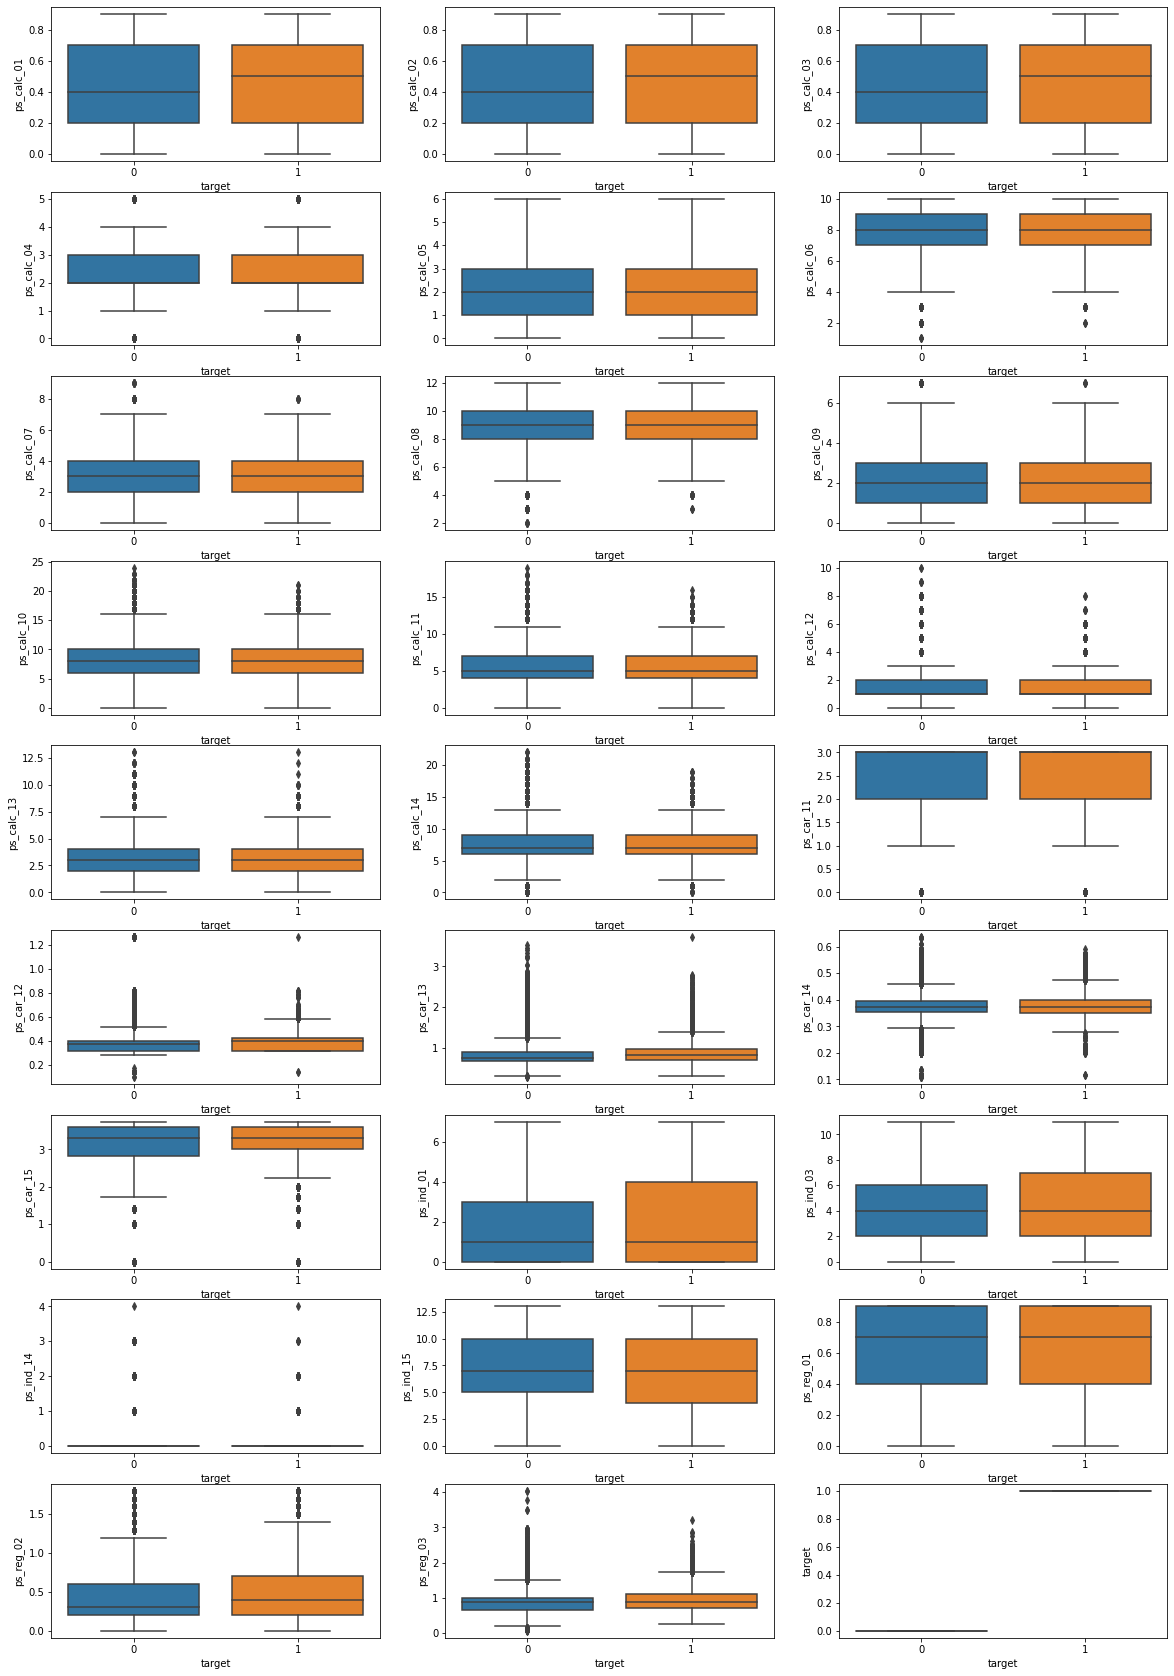

In [24]:
#checking for outliers in train_data_rest
multiple_plot_box_plot(df=train_data_rest, target='target', columns=train_data_rest.columns, nrow=9, ncol=3)

From above box plots, it is evident that ps_calc_04, ps_calc_06, ps_calc_07, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_ind_14, ps_reg_02, ps_reg_03 has outliers 

In [25]:
#removing outliers
def remove_outliers(df, column) :
    for col in column : 
        Q1 = df[[col]].quantile(0.25)
        Q3 = df[[col]].quantile(0.75)
        IQR = Q3 - Q1
        lower_whisker = Q1 - IQR*1.5
        upper_whisker = Q3 + IQR*1.5
        df.loc[(df[col]<lower_whisker[0]), col] = lower_whisker[0]
        df.loc[(df[col]>upper_whisker[0]), col] = upper_whisker[0]        
    
remove_outliers(train_data_rest, ['ps_car_12','ps_car_13','ps_car_14','ps_reg_03'])
remove_outliers(test_data_rest, ['ps_car_12','ps_car_13','ps_car_14','ps_reg_03'])

In [26]:
# ps_ind_14 has surplus of 0s as it previously had surplus of datapoints with value 0 
train_data_rest.drop(labels="ps_ind_14", axis=1, inplace=True)
test_data_rest.drop(labels="ps_ind_14", axis=1, inplace=True)

In [27]:
train_data_rest2 = train_data_rest.copy()
test_data_rest2 = test_data_rest.copy()

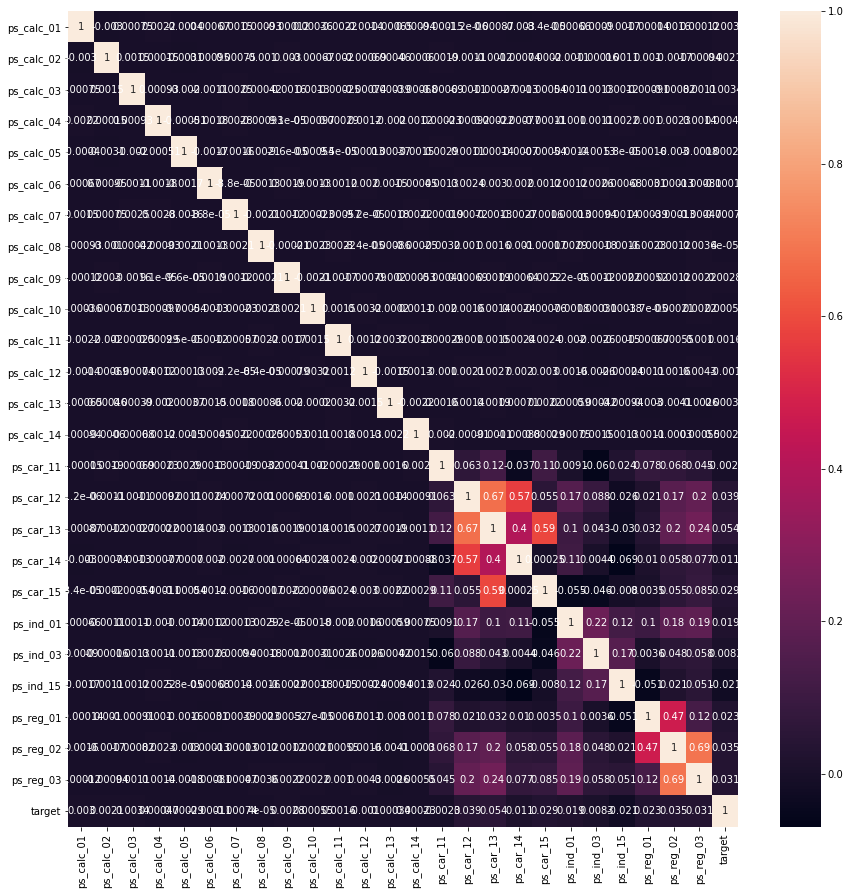

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data_rest.corr(), annot=True, color='b')

Significant Pearson correlation score for: 

*   ps_car_13 vs ps_car_12 is 0.67
*   ps_car_14 vs ps_car_12 is 0.57
*   ps_car_15 vs ps_car_13 is 0.62
*   ps_reg_02 vs ps_reg_03 is 0.68

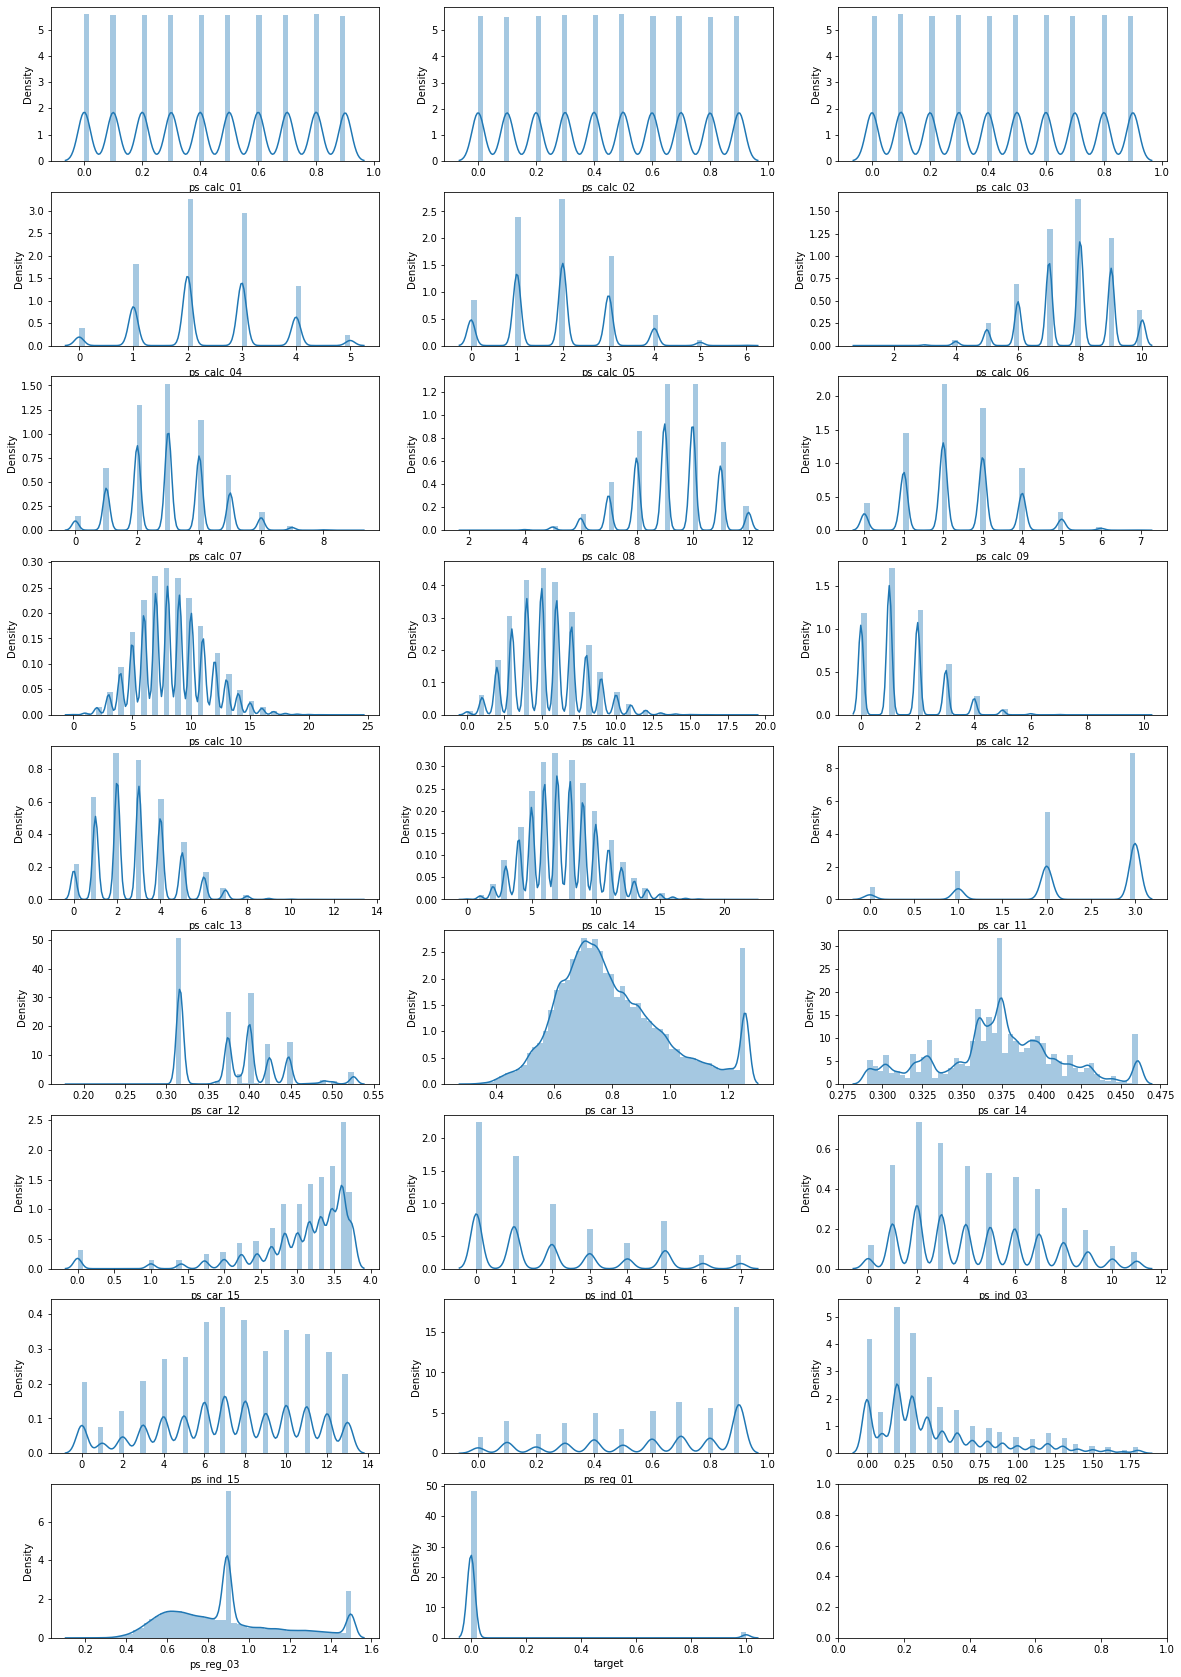

In [29]:
multiple_plot_dist_plot(train_data_rest, None, train_data_rest.columns, 9, 3 )

# Binary data analysis :

In [30]:
nan_value_count(train_data_bin)

ps_ind_06_bin 	 0 	 0.0
ps_ind_07_bin 	 0 	 0.0
ps_ind_08_bin 	 0 	 0.0
ps_ind_09_bin 	 0 	 0.0
ps_ind_10_bin 	 0 	 0.0
ps_ind_11_bin 	 0 	 0.0
ps_ind_12_bin 	 0 	 0.0
ps_ind_13_bin 	 0 	 0.0
ps_ind_16_bin 	 0 	 0.0
ps_ind_17_bin 	 0 	 0.0
ps_ind_18_bin 	 0 	 0.0
ps_calc_15_bin 	 0 	 0.0
ps_calc_16_bin 	 0 	 0.0
ps_calc_17_bin 	 0 	 0.0
ps_calc_18_bin 	 0 	 0.0
ps_calc_19_bin 	 0 	 0.0
ps_calc_20_bin 	 0 	 0.0
target 	 0 	 0.0


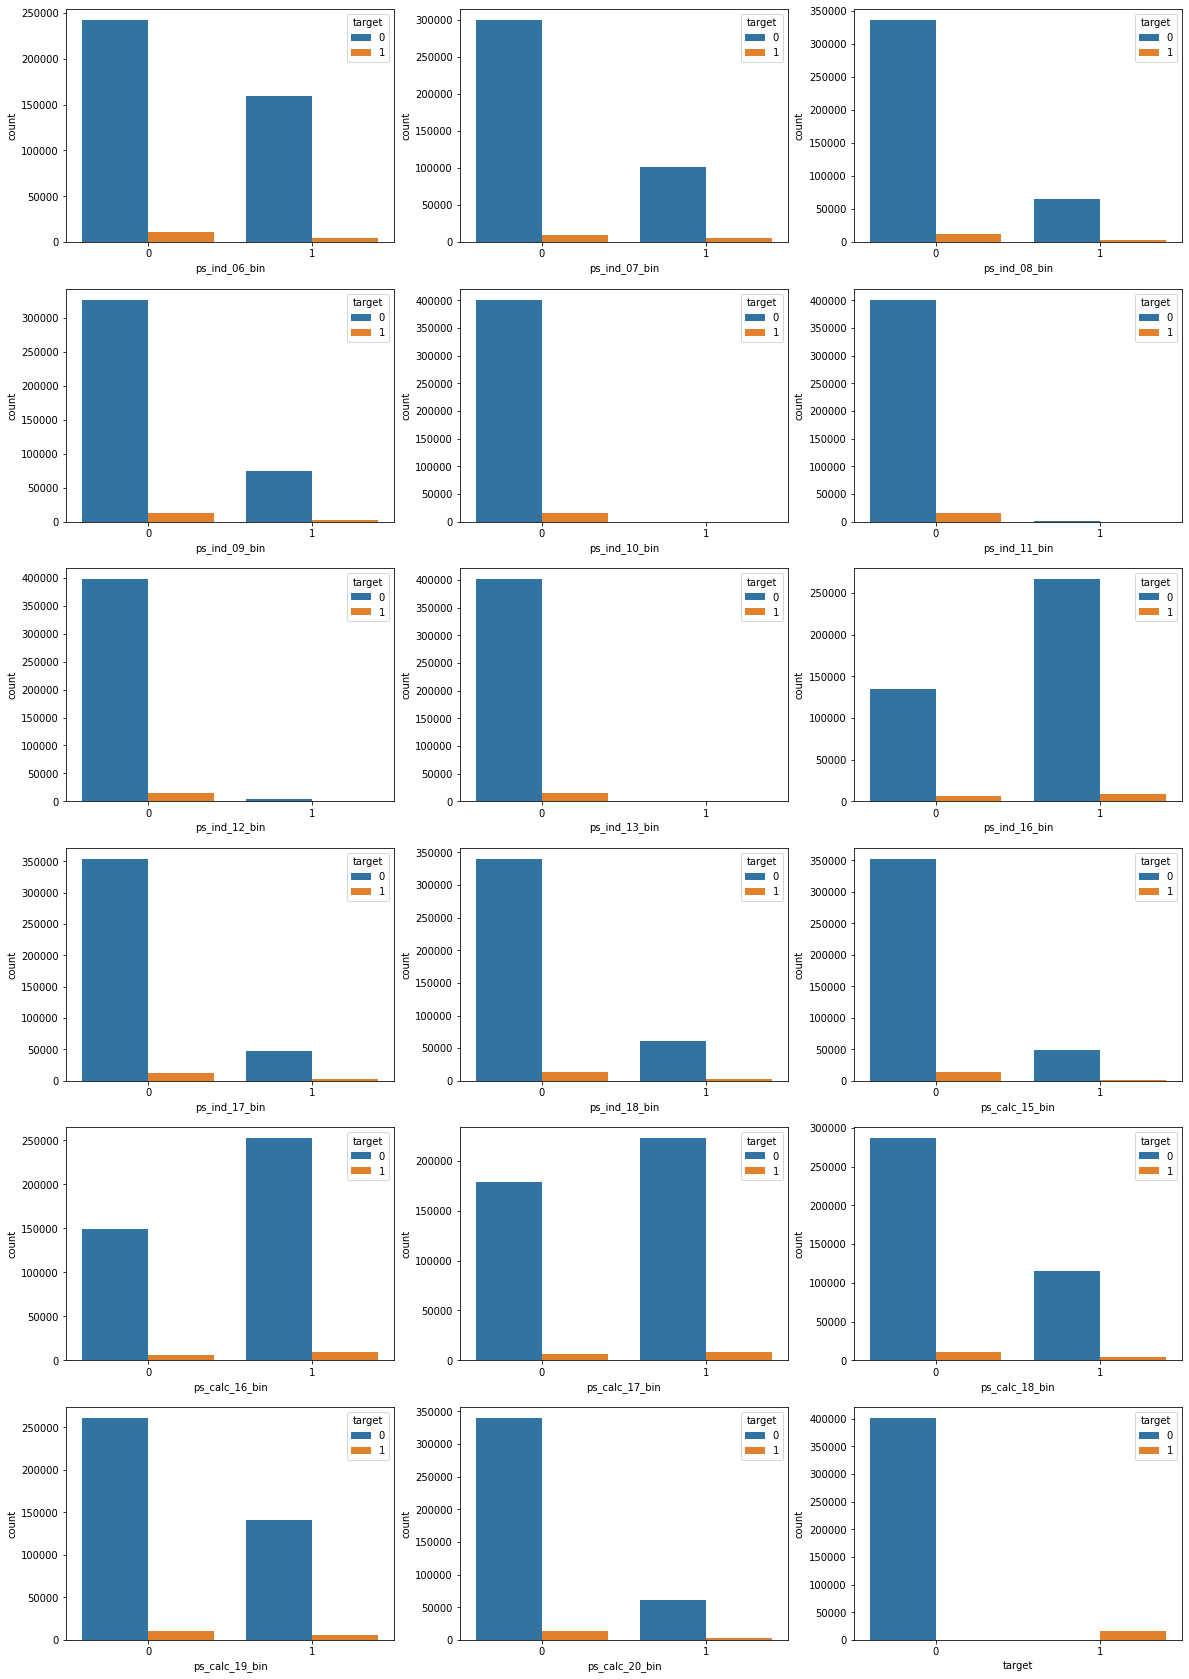

In [31]:
multiple_plot_count_plot(df=train_data_bin, target='target', columns=train_data_bin.columns, nrow=6, ncol=3)

Significant Pearson correlation for : 

*   ps_ind_16_bin vs ps_ind_17_bin is -0.52
*   ps_ind_16_bin vs ps_ind_18_bin is -0.59



In [32]:
# Data points highly populized by only one category value. So removed. 
train_data_bin2 = train_data_bin.drop(labels=['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin'], axis=1, inplace=False)
test_data_bin2 = test_data_bin.drop(labels=['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin'], axis=1, inplace=False)

# Categorical data analysis :

In [33]:
nan_value_count(train_data_cat)

target 	 0 	 0.0
ps_ind_02_cat 	 148 	 0.04
ps_ind_04_cat 	 55 	 0.01
ps_ind_05_cat 	 4047 	 0.97
ps_car_01_cat 	 76 	 0.02
ps_car_02_cat 	 2 	 0.0
ps_car_03_cat 	 288186 	 69.17
ps_car_04_cat 	 0 	 0.0
ps_car_05_cat 	 186614 	 44.79
ps_car_06_cat 	 0 	 0.0
ps_car_07_cat 	 8095 	 1.94
ps_car_08_cat 	 0 	 0.0
ps_car_09_cat 	 389 	 0.09
ps_car_10_cat 	 0 	 0.0
ps_car_11_cat 	 0 	 0.0


In [34]:
print(train_data_cat[["ps_ind_02_cat"]].value_counts())
print(train_data_cat[["ps_ind_04_cat"]].value_counts())
print(train_data_cat[["ps_ind_05_cat"]].value_counts())
print(train_data_cat[["ps_car_01_cat"]].value_counts())
print(train_data_cat[["ps_car_02_cat"]].value_counts())
print(train_data_cat[["ps_car_03_cat"]].value_counts())
print(train_data_cat[["ps_car_05_cat"]].value_counts())
print(train_data_cat[["ps_car_07_cat"]].value_counts())
print(train_data_cat[["ps_car_09_cat"]].value_counts())


ps_ind_02_cat
1.0              302549
2.0               86215
3.0               19701
4.0                8035
dtype: int64
ps_ind_04_cat
0.0              242750
1.0              173843
dtype: int64
ps_ind_05_cat
0.0              369635
6.0               14539
4.0               12722
1.0                5864
3.0                5759
2.0                2916
5.0                1166
dtype: int64
ps_car_01_cat
11.0             145635
7.0              125256
6.0               43695
10.0              35133
4.0               18388
9.0               14117
5.0               12573
8.0               10551
3.0                4611
0.0                4161
2.0                1522
1.0                 930
dtype: int64
ps_car_02_cat
1.0              345794
0.0               70852
dtype: int64
ps_car_03_cat
1.0              77346
0.0              51116
dtype: int64
ps_car_05_cat
1.0              121159
0.0              108875
dtype: int64
ps_car_07_cat
1.0              387211
0.0               21342
dtype: 

In [35]:
# replacing missing of the following with mode as these are categorical 
train_data_cat["ps_ind_02_cat"].fillna(value=train_data_cat["ps_ind_02_cat"].mode()[0], inplace=True);
train_data_cat["ps_ind_04_cat"].fillna(value=train_data_cat["ps_ind_04_cat"].mode()[0], inplace=True);
train_data_cat["ps_ind_05_cat"].fillna(value=train_data_cat["ps_ind_05_cat"].mode()[0], inplace=True);
train_data_cat["ps_car_01_cat"].fillna(value=train_data_cat["ps_car_01_cat"].mode()[0], inplace=True);
train_data_cat["ps_car_02_cat"].fillna(value=train_data_cat["ps_car_02_cat"].mode()[0], inplace=True);
train_data_cat["ps_car_07_cat"].fillna(value=train_data_cat["ps_car_07_cat"].mode()[0], inplace=True);
train_data_cat["ps_car_09_cat"].fillna(value=train_data_cat["ps_car_09_cat"].mode()[0], inplace=True);


In [36]:
# replacing missing of the following with mode as these are categorical 
test_data_cat["ps_ind_02_cat"].fillna(value=train_data_cat["ps_ind_02_cat"].mode()[0], inplace=True);
test_data_cat["ps_ind_04_cat"].fillna(value=train_data_cat["ps_ind_04_cat"].mode()[0], inplace=True);
test_data_cat["ps_ind_05_cat"].fillna(value=train_data_cat["ps_ind_05_cat"].mode()[0], inplace=True);
test_data_cat["ps_car_01_cat"].fillna(value=train_data_cat["ps_car_01_cat"].mode()[0], inplace=True);
test_data_cat["ps_car_02_cat"].fillna(value=train_data_cat["ps_car_02_cat"].mode()[0], inplace=True);
test_data_cat["ps_car_07_cat"].fillna(value=train_data_cat["ps_car_07_cat"].mode()[0], inplace=True);
test_data_cat["ps_car_09_cat"].fillna(value=train_data_cat["ps_car_09_cat"].mode()[0], inplace=True);


In [37]:
# dropping ps_car_03_cat and ps_car_05_cat due to large missing data (To be discussed) 

train_data_cat2 = train_data_cat.drop(labels=["ps_car_03_cat","ps_car_05_cat"], axis=1, inplace=False)
test_data_cat2 = test_data_cat.drop(labels=["ps_car_03_cat","ps_car_05_cat"], axis=1, inplace=False)


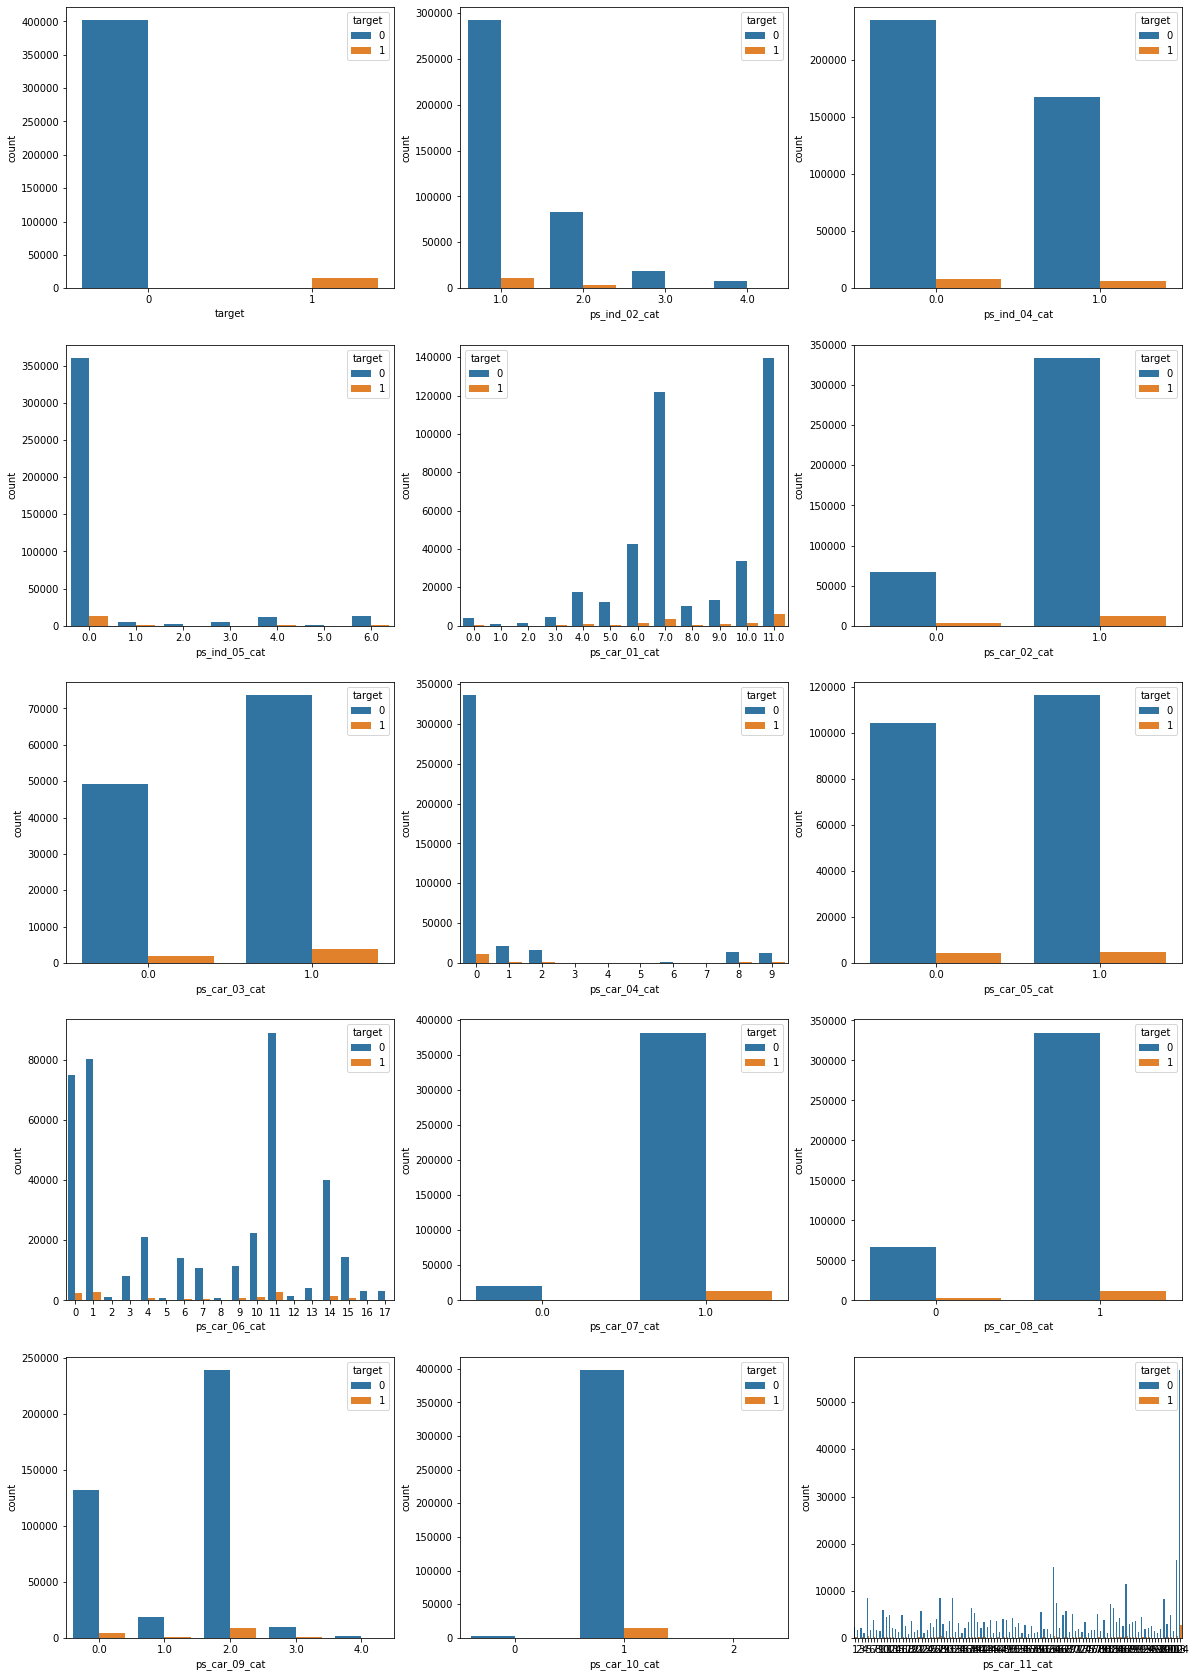

In [38]:
multiple_plot_count_plot(df=train_data_cat, target='target', columns=train_data_cat.columns, nrow=5, ncol=3)

In [39]:
# Dropped because data is highly biased for only one category
train_data_cat2.drop(labels=["ps_car_10_cat"], axis=1, inplace=True)
test_data_cat2.drop(labels=["ps_car_10_cat"], axis=1, inplace=True)

# Learning 

In [40]:
train_data_rest2.drop(labels=['ps_calc_01', 'ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_07','ps_calc_09',
                              'ps_car_11','ps_reg_01'], axis=1, inplace=True)
test_data_rest2.drop(labels=['ps_calc_01', 'ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_07','ps_calc_09',
                              'ps_car_11','ps_reg_01'], axis=1, inplace=True)

In [41]:
#train_data_rest.drop(labels=["target"], axis=1, inplace=True)
train_data_rest2.drop(labels=["target"], axis=1, inplace=True)
train_data_cat2.drop(labels=["target"], axis=1, inplace=True)
train_data_bin2.drop(labels=["target"], axis=1, inplace=True)

In [42]:
X = pd.concat([train_data_rest2, train_data_bin2, train_data_cat2], axis=1) 
Xt = pd.concat([test_data_rest2, test_data_bin2, test_data_cat2], axis=1)
label = train_data[["target"]]


In [ ]:
train_data_cat2.nunique()

ps_ind_02_cat      4
ps_ind_04_cat      2
ps_ind_05_cat      7
ps_car_01_cat     12
ps_car_02_cat      2
ps_car_04_cat     10
ps_car_06_cat     18
ps_car_07_cat      2
ps_car_08_cat      2
ps_car_09_cat      5
ps_car_10_cat      3
ps_car_11_cat    104
dtype: int64

In [ ]:
# X = pd.get_dummies(X, columns= ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat',
#        'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat',
#         'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
#        'ps_car_09_cat', 'ps_car_11_cat'])
# Xt = pd.get_dummies(Xt, columns= ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat',
#        'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat',
#         'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
#        'ps_car_09_cat', 'ps_car_11_cat'])

In [ ]:
l = zero_value_count(X)
X.drop(columns=l, axis=1, inplace=True) 
Xt.drop(columns=l, axis=1, inplace=True)

ps_calc_01 	 ps_calc_01    0.1
dtype: float64
ps_calc_02 	 ps_calc_02    0.1
dtype: float64
ps_calc_03 	 ps_calc_03    0.1
dtype: float64
ps_calc_04 	 ps_calc_04    0.04
dtype: float64
ps_calc_05 	 ps_calc_05    0.1
dtype: float64
ps_calc_06 	 ps_calc_06    0.0
dtype: float64
ps_calc_07 	 ps_calc_07    0.03
dtype: float64
ps_calc_08 	 ps_calc_08    0.0
dtype: float64
ps_calc_09 	 ps_calc_09    0.06
dtype: float64
ps_calc_10 	 ps_calc_10    0.0
dtype: float64
ps_calc_11 	 ps_calc_11    0.0
dtype: float64
ps_calc_12 	 ps_calc_12    0.24
dtype: float64
ps_calc_13 	 ps_calc_13    0.06
dtype: float64
ps_calc_14 	 ps_calc_14    0.0
dtype: float64
ps_car_11 	 ps_car_11    0.04
dtype: float64
ps_car_12 	 ps_car_12    0.0
dtype: float64
ps_car_13 	 ps_car_13    0.0
dtype: float64
ps_car_14 	 ps_car_14    0.0
dtype: float64
ps_car_15 	 ps_car_15    0.02
dtype: float64
ps_ind_01 	 ps_ind_01    0.31
dtype: float64
ps_ind_03 	 ps_ind_03    0.03
dtype: float64
ps_ind_14 	 ps_ind_14    0.99
dtype: fl

In [43]:
encode_FE(X,Xt,X.columns)

In [44]:
X_train, X_test, Y_train, Y_test = tts(X, label, test_size=0.2, random_state=10, stratify=label)


In [ ]:
scaler = StandardScaler()
#clf = LogisticRegression(max_iter=1000, class_weight={0:1,1:15}, random_state=10, verbose=1).fit(scaler.fit_transform(X_train), Y_train);
#clf = RandomForestClassifier(n_estimators=1200, min_samples_leaf=1000, max_leaf_nodes=100, random_state=10, class_weight="balanced", verbose=1)
clf = LogisticRegression(max_iter=1000, random_state=10, verbose=1) 
clf.fit(X_train_res,Y_train_res) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.2min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [ ]:

from imblearn.ensemble import EasyEnsembleClassifier, BalancedRandomForestClassifier

erf = EasyEnsembleClassifier( n_estimators=200, base_estimator= RandomForestClassifier(n_estimators=5, random_state=10))
#erf = BalancedRandomForestClassifier(random_state=10, class_weight="balanced")
erf.fit(X_train, Y_train)

EasyEnsembleClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                               

In [ ]:
eval_set = [(X_train, Y_train),(X_test,Y_test)]
xgb_model = XGBClassifier(max_depth=3, learning_rate=0.05, n_estimators=100, verbosity=1, silent=None, objective='binary:logistic', 
                          booster='gbtree',gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, 
                          colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=25)
xgb_model.fit(X_train, Y_train, eval_set=eval_set, eval_metric="auc")

[0]	validation_0-auc:0.58904	validation_1-auc:0.589466
[1]	validation_0-auc:0.598281	validation_1-auc:0.598135
[2]	validation_0-auc:0.603376	validation_1-auc:0.603343
[3]	validation_0-auc:0.605251	validation_1-auc:0.605123
[4]	validation_0-auc:0.608274	validation_1-auc:0.606944


KeyboardInterrupt: ignored

In [ ]:
p = xgb_model.predict(X_test)
print("ROC AOC Score : ",roc_auc_score(Y_test, p) )
print("Precision Score : ",precision_score(Y_test, p))
print("Recall Score : ",recall_score(Y_test, p))
print("F1 Score : ",f1_score(Y_test, p))
print("Accuracy Score : ",accuracy_score(Y_test, p))

ROC AOC Score :  0.5922068953360331
Precision Score :  0.06115943348968532
Recall Score :  0.4411957950065703
F1 Score :  0.10742710874695037
Accuracy Score :  0.7321852874114965


In [ ]:
import lightgbm as lgb
eval_set = [(X_train, Y_train), (X_test,Y_test)]
clf = lgb.LGBMClassifier(boosting_type='gbdt', metric="auc", num_leaves=31, max_depth=50, learning_rate=0.01, n_estimators=1000,                          
                         objective="binary", scale_pos_weight=26.77, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, 
                         subsample=0.8, subsample_freq=1, colsample_bytree=0.5, reg_alpha=0.0, reg_lambda=0.0, early_stopping_rounds=100)
                         
clf.fit(X_train, Y_train, eval_metric=["aucpr"], eval_set=eval_set)

[1]	training's auc: 0.610539	valid_1's auc: 0.601115
Training until validation scores don't improve for 100 rounds.
[2]	training's auc: 0.622842	valid_1's auc: 0.617995
[3]	training's auc: 0.628158	valid_1's auc: 0.620868
[4]	training's auc: 0.633659	valid_1's auc: 0.625592
[5]	training's auc: 0.635818	valid_1's auc: 0.627317
[6]	training's auc: 0.63745	valid_1's auc: 0.628386
[7]	training's auc: 0.638792	valid_1's auc: 0.629618
[8]	training's auc: 0.640683	valid_1's auc: 0.630016
[9]	training's auc: 0.64197	valid_1's auc: 0.630229
[10]	training's auc: 0.643403	valid_1's auc: 0.630708
[11]	training's auc: 0.644581	valid_1's auc: 0.631195
[12]	training's auc: 0.646076	valid_1's auc: 0.63258
[13]	training's auc: 0.646796	valid_1's auc: 0.632731
[14]	training's auc: 0.646982	valid_1's auc: 0.632866
[15]	training's auc: 0.647519	valid_1's auc: 0.632987
[16]	training's auc: 0.648225	valid_1's auc: 0.633203
[17]	training's auc: 0.648609	valid_1's auc: 0.633142
[18]	training's auc: 0.649244	v

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
               early_stopping_rounds=100, importance_type='split',
               learning_rate=0.01, max_depth=50, metric='auc',
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=31, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               scale_pos_weight=26.77, silent=True, subsample=0.8,
               subsample_for_bin=200000, subsample_freq=1)

In [ ]:
p = clf.predict(X_test)
print("ROC AOC Score : ",roc_auc_score(Y_test, p) )
print("Precision Score : ",precision_score(Y_test, p))
print("Recall Score : ",recall_score(Y_test, p))
print("F1 Score : ",f1_score(Y_test, p))
print("Accuracy Score : ",accuracy_score(Y_test, p))

ROC AOC Score :  0.6021560757021637
Precision Score :  0.056288333443250016
Recall Score :  0.5607752956636005
F1 Score :  0.10230746179202876
Accuracy Score :  0.6405136205448217


In [ ]:
from catboost import CatBoostClassifier
CBModel = CatBoostClassifier(depth = 4, learning_rate = 0.05, iterations=500, scale_pos_weight= 24, random_state = 2021,eval_metric="AUC")
CBModel.fit(X_train, Y_train, eval_set=(X_test, Y_test))

Y_pred = CBModel.predict(X_test)

f1_score(Y_test, Y_pred.round())

accuracy_score(Y_test, Y_pred.round())


0:	test: 0.5758844	best: 0.5758844 (0)	total: 118ms	remaining: 58.8s
1:	test: 0.5927108	best: 0.5927108 (1)	total: 233ms	remaining: 58.1s
2:	test: 0.6046330	best: 0.6046330 (2)	total: 358ms	remaining: 59.3s
3:	test: 0.6040942	best: 0.6046330 (2)	total: 471ms	remaining: 58.4s
4:	test: 0.6070411	best: 0.6070411 (4)	total: 586ms	remaining: 58s
5:	test: 0.6068221	best: 0.6070411 (4)	total: 697ms	remaining: 57.4s
6:	test: 0.6076696	best: 0.6076696 (6)	total: 827ms	remaining: 58.3s
7:	test: 0.6105549	best: 0.6105549 (7)	total: 945ms	remaining: 58.1s
8:	test: 0.6111714	best: 0.6111714 (8)	total: 1.06s	remaining: 58s
9:	test: 0.6116524	best: 0.6116524 (9)	total: 1.18s	remaining: 58.1s
10:	test: 0.6108365	best: 0.6116524 (9)	total: 1.3s	remaining: 58s
11:	test: 0.6107409	best: 0.6116524 (9)	total: 1.42s	remaining: 57.6s
12:	test: 0.6115138	best: 0.6116524 (9)	total: 1.54s	remaining: 57.8s
13:	test: 0.6117135	best: 0.6117135 (13)	total: 1.67s	remaining: 57.8s
14:	test: 0.6133400	best: 0.6133400 

In [53]:
p = CBModel.predict(X_test)
print("ROC AOC Score : ",roc_auc_score(Y_test, p) )
print("Precision Score : ",precision_score(Y_test, p))
print("Recall Score : ",recall_score(Y_test, p))
print("F1 Score : ",f1_score(Y_test, p))
print("Accuracy Score : ",accuracy_score(Y_test, p))

ROC AOC Score :  0.5893546659719099
Precision Score :  0.05802033787108414
Recall Score :  0.4648488830486202
F1 Score :  0.10316418780985712
Accuracy Score :  0.7047641905676227


In [ ]:
X_test1 = X_test[Y_test["target"]==1]
probabilities = xgb_model.predict_proba(X_test) 
# use X_test1 to see probabilities for 1. Else X_test for probabilities over all test data

In [ ]:
#view probabilities of each class 
pred = pd.DataFrame(np.around(probabilities, decimals=4), columns = ["0", "1"])
pred["1"].mean()

0.44087153673171997

In [ ]:
# set threshold based on probabilties for personalized target output  
pred["target"] = pred["1"].apply(lambda x: 1 if x >= 0.52 else 0)
pred

,0,1,target
0,0.4204,0.5796,1
1,0.5868,0.4132,0
2,0.6784,0.3216,0
3,0.6862,0.3138,0
4,0.5970,0.4030,0
...,...,...,...
83325,0.6791,0.3209,0
83326,0.6070,0.3930,0
83327,0.6546,0.3454,0
83328,0.5750,0.4250,0


In [ ]:
p = pred["target"][:,np.newaxis]
p.shape

(83330, 1)

In [ ]:
accuracy_score(p, Y_test)

0.7883835353414137

In [ ]:
cm(Y_test, clf.predict(X_test))
#cm(Y_test, p)

array([[62274, 18012],
       [ 1834,  1210]])

In [ ]:
f1_score(Y_test, clf.predict(X_test))

0.10868588879906584

# Test

In [ ]:
Xt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178564 entries, 0 to 178563
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ps_calc_02_FE      178564 non-null  float32
 1   ps_calc_06_FE      178563 non-null  float32
 2   ps_calc_08_FE      178564 non-null  float32
 3   ps_calc_10_FE      178563 non-null  float32
 4   ps_calc_11_FE      178564 non-null  float32
 5   ps_calc_12_FE      178564 non-null  float32
 6   ps_calc_13_FE      178564 non-null  float32
 7   ps_calc_14_FE      178563 non-null  float32
 8   ps_car_12_FE       178560 non-null  float32
 9   ps_car_13_FE       161447 non-null  float32
 10  ps_car_14_FE       156259 non-null  float32
 11  ps_car_15_FE       178564 non-null  float32
 12  ps_ind_01_FE       178564 non-null  float32
 13  ps_ind_03_FE       178564 non-null  float32
 14  ps_ind_15_FE       178564 non-null  float32
 15  ps_reg_02_FE       178564 non-null  float32
 16  ps

In [ ]:
probabilities = CBModel.predict_proba(Xt)
# use X_test1 to see probabilities for 1. Else X_test for probabilities over all test data

In [ ]:
#view probabilities of each class 
pred = pd.DataFrame(np.around(probabilities, decimals=4), columns = ["0", "1"])


In [ ]:
# converting id and terget to dataframe for merging 
ydf = pd.DataFrame({"target":list(pred["1"])})
idf = pd.DataFrame({"id":list(test_data["id"])}) 
det = pd.concat([idf,ydf], join = 'outer', axis = 1) 

In [ ]:

det.to_csv("test_op.csv", index=False)


In [ ]:
det

,id,target
0,1225226,0.4637
1,487111,0.3114
2,1328243,0.6793
3,388051,0.3556
4,1454785,0.4555
...,...,...
178559,241164,0.3426
178560,720555,0.5528
178561,65816,0.3145
178562,538640,0.3462
